<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Checkout

All the codes are done in google colab and is relative to it

### Clone the yolov5 repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

### Install required dependancies

In [1]:
!pip install -r requirements.txt

  Using cached torch-1.11.0-cp39-cp39-win_amd64.whl (157.9 MB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


### Importing Custom Dataset from Robo Flow

In [ ]:
%pip install -q roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace().project("YOUR PROJECT")
dataset = project.version("YOUR VERSION").download("yolov5")

### Train the model

Here I've used custom dataset made with Roboflow. 

In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --batch 32 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 24 --name yolo_det_grocery_final

wandb: Currently logged in as: nakulvarma2000. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_det_grocery_final, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (16/16), done.
remote: Total 23 (delta 16), reused 16 (delta 16), pack-reused 7
Unpacking objects: 100% (23/23), done.
From https://github.com/ultralytics/yolov5
   ce97b67..479a9ac  classifier -> origin/classifier
githu

### Validate the model

In [ ]:
!python detect.py --source /content/yolov5/dataset/test/images --weights runs/train/yolo_det_grocery_final/weights/best.pt --conf 0.25 --name yolo_det_grocery_final2

detect: weights=['runs/train/yolo_det_grocery_final/weights/best.pt'], source=/content/yolov5/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_det_grocery_final, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/61 /content/yolov5/dataset/test/images/bread100_jpg.rf.5b5e714a299c6c79dd6495153cabb938.jpg: 640x640 1 bread, Done. (0.014s)
image 2/61 /content/yolov5/dataset/test/images/bread103_jpg.rf.7ff0442aa1123815cd4049dd4643388c.jpg: 640x640 1 bread, Done. (0.014s)
image 3/61 /content/yolov5/dataset/tes

### Run the detection on test samples

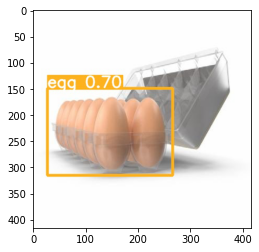

In [ ]:
detections_dir = "runs/detect/yolo_det_grocery_final2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

Here you can see that the model works well in detection and egg is predicted with 70% confidence

### Save the best values of the model for future predictions

In [ ]:
shutil.copy("/content/yolov5/runs/train/yolo_det_grocery_final/weights/best.pt","/content/drive/MyDrive/")

'/content/drive/MyDrive/best.pt'